In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

pandas: Library that is used to manage data in the form of a table (data frame)

seaboarn: This library is also used for data visualization, especially for making scatter plots.

In [8]:
iris_data = pd.read_csv('iris/iris.data')
iris_data
type(iris_data)

pandas.core.frame.DataFrame

In [9]:
columns_name = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"]
iris_data.columns = columns_name
iris_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
iris_data.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

In [13]:
iris_data.value_counts("Class")

Class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

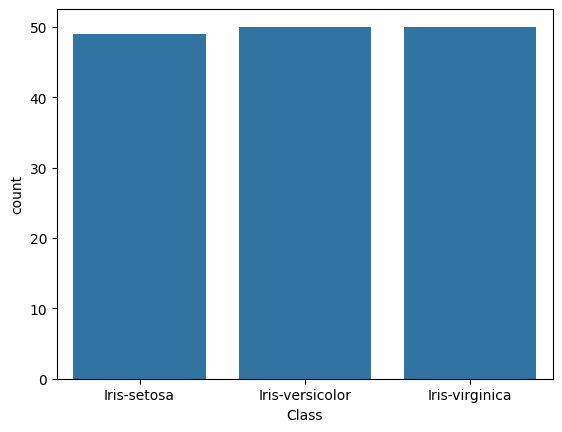

In [14]:
sns.countplot(x="Class", data=iris_data)

[Text(0.5, 1.0, 'Sepal Length and Sepal Width')]

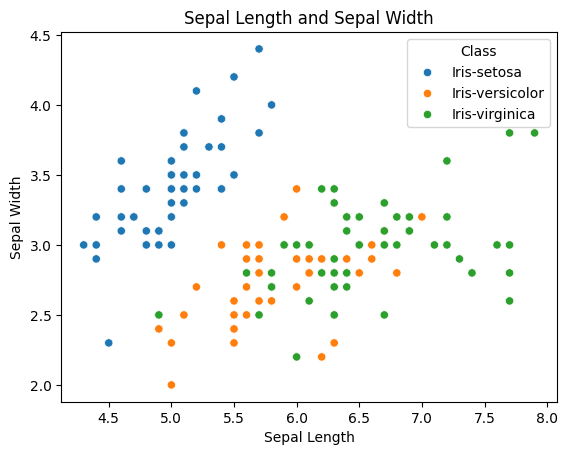

In [12]:
figure1 = sns.scatterplot(x="Sepal Length", y="Sepal Width", hue="Class", data=iris_data)
figure1.set(title="Sepal Length and Sepal Width")

[Text(0.5, 1.0, 'Sepal Length and Sepal Width')]

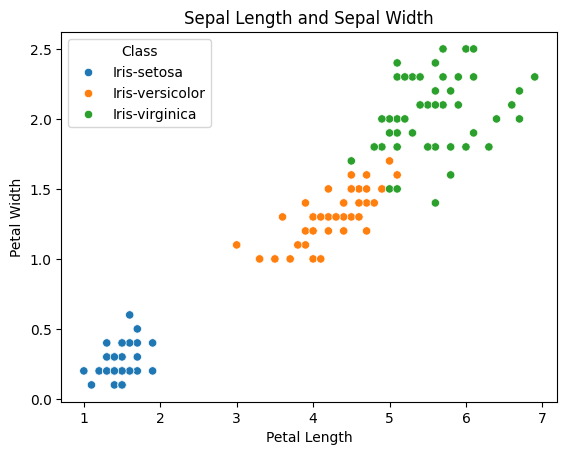

In [13]:
figure2=sns.scatterplot(x="Petal Length", y="Petal Width", hue="Class", data=iris_data)
figure2.set(title="Sepal Length and Sepal Width")

In [14]:
features = iris_data.iloc[:, 0:4]
label = iris_data.iloc[:, 4]
print("Features: ")
print(features)
print("Label: ")
print(label)

Features: 
     Sepal Length  Sepal Width  Petal Length  Petal Width
0             4.9          3.0           1.4          0.2
1             4.7          3.2           1.3          0.2
2             4.6          3.1           1.5          0.2
3             5.0          3.6           1.4          0.2
4             5.4          3.9           1.7          0.4
..            ...          ...           ...          ...
144           6.7          3.0           5.2          2.3
145           6.3          2.5           5.0          1.9
146           6.5          3.0           5.2          2.0
147           6.2          3.4           5.4          2.3
148           5.9          3.0           5.1          1.8

[149 rows x 4 columns]
Label: 
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Class, Length

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(features, label, test_size=0.2, random_state=0)

In [17]:
print("Number of data trained: ", X_train.shape[0])
print("Number of Data Test: ", Y_test.shape[0])
print("Number of data test: ", X_test.shape[0])
print("Number of Data trained: ", Y_train.shape[0])

Number of data trained:  119
Number of Data Test:  30
Number of data test:  30
Number of Data trained:  119


# x = features
# y = label (class)
# test_size = 20% of available data

# meet 11

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')  
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [44]:
train_acc = knn.score(X_train, Y_train)
print(f"The accuracy of the KNN Classifier is: {train_acc}")
print("The accuracy Of KNN classifier on training data is : {:.3f}".format(train_acc))

The accuracy of the KNN Classifier is: 0.9663865546218487
The accuracy Of KNN classifier on training data is : 0.966


In [21]:
knn_test_acc = knn.score(X_test, Y_test)
print("The accuracy of the testing data is : {:.3f}".format(knn_test_acc))

The accuracy of the testing data is : 0.967


In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

Text(0.5, 1.0, 'Confusion Matrix')

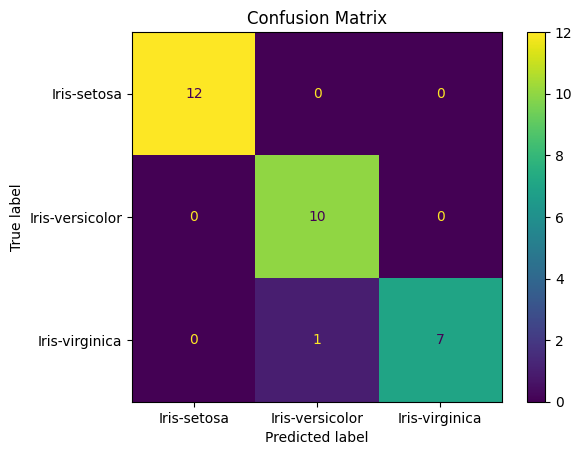

In [23]:
disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, Y_test)
disp.ax_.set_title("Confusion Matrix")

In [24]:
from subprocess import check_output
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [25]:
n_range = list(range(1,10))
weight_list = ["uniform","distance"]
param_grid = {"n_neighbors": n_range, "weights":weight_list}


In [26]:
grid = GridSearchCV(estimator = KNeighborsClassifier(),

param_grid = param_grid,
cv = 3,
scoring = "accuracy",
refit = True)

In [27]:
knn_model = make_pipeline(preprocessing.StandardScaler(), grid)

In [28]:
knn_model.fit(features, label)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9],
                                          'weights': ['uniform', 'distance']},
                              scoring='accuracy'))])

In [29]:
print("Accuracy of the tuned model: %.4f" %grid.best_score_)


Accuracy of the tuned model: 0.9665


In [30]:
grid.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

pickle/save the thing


In [31]:
import pickle

In [32]:
with open("knn_model.pickle", "wb") as f:
  pickle.dump(knn_model, f)